# day06: Q-learning

# 1. Q-Learning 
- On given GridWorldEnv
- It provides
  - env.step(action) : returns (next state, reward, terminated, info)

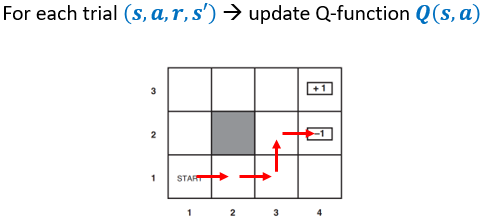

### The agent

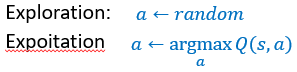

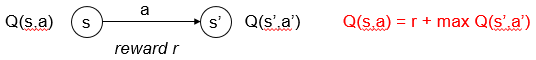
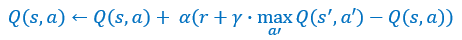

In [1]:
from collections import defaultdict
import numpy as np

class Agent(object):

    def __init__(self, env, learning_rate=0.01, discount_factor=0.9, epsilon_greedy=0.9):
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon_greedy

        # define the q_table
        self.q_table = defaultdict(lambda: np.zeros(self.env.nA))

    # choose action according to the Q values
    def choose_action(self, state):
        
        # exploration - choose random action
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.env.nA)
            
        # exploitation - choose action with max Q value
        else:
            q_vals = self.q_table[state]
            actions = np.random.permutation(self.env.nA)
            q_vals = [q_vals[a] for a in actions]
            q_argmax = np.argmax(q_vals)
            action = actions[q_argmax]
        return action

    # update Q values from experience (s, a, r, s')
    def _learn(self, transition):
        s, a, r, next_s, done = transition
        q_val = self.q_table[s][a]
        if done:
            q_target = r
        else:
            q_target = r + self.gamma*np.max(self.q_table[next_s])

        # Update the q_table
        self.q_table[s][a] += self.lr * (q_target - q_val)

### Q-learning on grid world

In [2]:
from gridworld_env import GridWorldEnv
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
Transition = namedtuple(
    'Transition', ('state', 'action', 'reward', 'next_state', 'done'))

# Perform Q learning for given number of episodes
def run_qlearning(agent, env, num_episodes=100):
    
    history = []
    for episode in range(num_episodes+1):
        state = env.reset()
        env.render(mode='human')
        
        final_reward, n_moves = 0.0, 0
        while True:
            
            # choose next action at current state (exploitation or exploration)
            action = agent.choose_action(state)
            
            # result of the action - next state and reward
            next_s, reward, done, _ = env.step(action)
            
            # Q learning from (s, a, r, s')
            agent._learn(Transition(state, action, reward, next_s, done))
            
            env.render(mode='human', done=done)
            state = next_s
            n_moves += 1
            if done:
                break
                
            final_reward = reward
            
        history.append((n_moves, final_reward))
        print('Episode %d: Reward %.1f #Moves %d' % (episode, final_reward, n_moves))

    return history

In [3]:
env = GridWorldEnv(num_rows=5, num_cols=6)
agent = Agent(env, learning_rate=1.0, epsilon_greedy=0.0)

history = run_qlearning(agent, env, num_episodes=30)
env.close()

Episode 0: Reward -1.0 #Moves 7
Episode 1: Reward -1.0 #Moves 19
Episode 2: Reward 1.0 #Moves 47
Episode 3: Reward -1.0 #Moves 16
Episode 4: Reward -1.0 #Moves 19
Episode 5: Reward 1.0 #Moves 54
Episode 6: Reward -1.0 #Moves 220
Episode 7: Reward -1.0 #Moves 136
Episode 8: Reward -1.0 #Moves 45
Episode 9: Reward 1.0 #Moves 196
Episode 10: Reward 1.0 #Moves 34
Episode 11: Reward 1.0 #Moves 66
Episode 12: Reward 1.0 #Moves 23
Episode 13: Reward 1.0 #Moves 224
Episode 14: Reward 1.0 #Moves 28
Episode 15: Reward 1.0 #Moves 49
Episode 16: Reward 1.0 #Moves 26
Episode 17: Reward 1.0 #Moves 17
Episode 18: Reward 1.0 #Moves 14
Episode 19: Reward 1.0 #Moves 9
Episode 20: Reward 1.0 #Moves 9
Episode 21: Reward 1.0 #Moves 9
Episode 22: Reward 1.0 #Moves 9
Episode 23: Reward 1.0 #Moves 9
Episode 24: Reward 1.0 #Moves 9
Episode 25: Reward 1.0 #Moves 9
Episode 26: Reward 1.0 #Moves 9
Episode 27: Reward 1.0 #Moves 9
Episode 28: Reward 1.0 #Moves 9
Episode 29: Reward 1.0 #Moves 9
Episode 30: Reward 1.

### Plot the learning history

In [4]:
def plot_learning_history(history):
    fig = plt.figure(1, figsize=(14, 10))
    
    ax = fig.add_subplot(2, 1, 1)
    episodes = np.arange(len(history))
    
    moves = np.array([h[0] for h in history])
    plt.plot(episodes, moves, lw=4, marker="o", markersize=10)
    
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('# moves', size=20)

    ax = fig.add_subplot(2, 1, 2)
    
    rewards = np.array([h[1] for h in history])
    plt.step(episodes, rewards, lw=4)
    
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('Final rewards', size=20)
    plt.savefig('q-learning-history.png', dpi=300)
    plt.show()


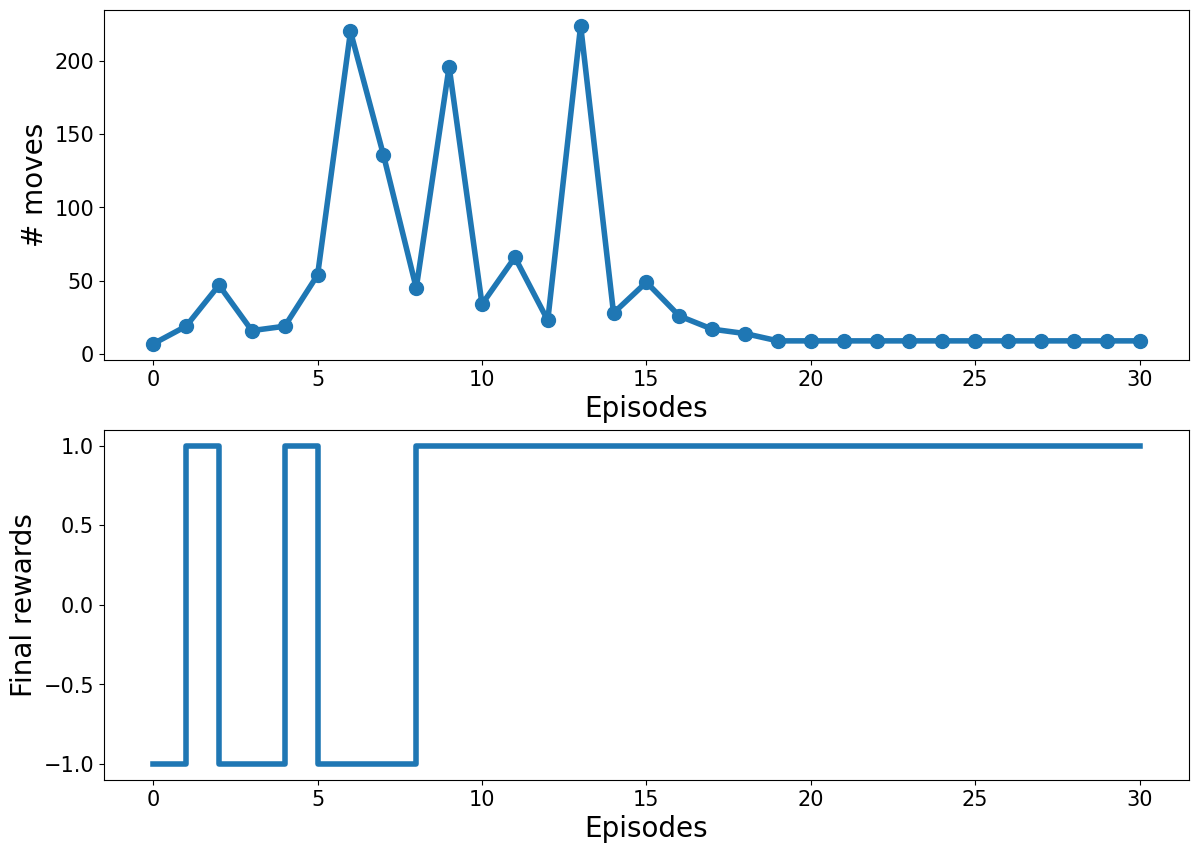

In [5]:
plot_learning_history(history)

---